<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [4]:
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Предобработка данных

Проверка на пропуски

In [5]:
train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [6]:
test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [7]:
full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Заполним пропуски средним по столбцу

In [8]:
def filling_null(data):
    for i in data.columns:
        if data[i].isna().sum() != 0:
            data[i] = data[i].fillna(data[i].median())
    return data

In [9]:
train = filling_null(train)
test = filling_null(test)
full = filling_null(full)

In [10]:
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

Проверка на дубликаты

In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

In [13]:
full.duplicated().sum()

0

Проверка типов данных

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Приводим данные в столбце date к временному типу

In [15]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

Расчет эффективности обогащения

In [16]:
def recovery(row):
    ch = row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au'])
    zn = row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])
    return (ch / zn) * 100

In [17]:
recovery = train.apply(recovery, axis=1)
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [18]:
print('mean absolute error for rougher.output.recovery:', round(
    mean_absolute_error(recovery,train['rougher.output.recovery']),2))

mean absolute error for rougher.output.recovery: 0.0


Эффективность обогащения расчитана, правильно, показатель mse = 0 

Поиск признаков, недоступных в тестовой выборке

In [19]:
print('Размер обучающей выборки:', train.shape)
print('Размер тестовой выборки:', test.shape)

Размер обучающей выборки: (14149, 87)
Размер тестовой выборки: (5290, 53)


In [20]:
def find(sheet1, sheet2):
    res = []
    for i in range(len(sheet1)):
        if not (sheet1[i] in sheet2):
            res.append(sheet1[i])
    return res

In [21]:
sh = find(train.columns, test.columns)
len(sh)#проверка, что нашли все признаки

34

In [22]:
sh

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке недоступны параметры, связанные с характеристикой продукта, причем на всех этапах

Так же была проведена предобработка данных, дубликаты не были найдены, а пропуски были обработаны

## Анализ данных

Проверка изменения концентрации металлов на разных этапах очистки

Концентрация металлов при флотации

<AxesSubplot:title={'center':'Распределение концентрации золота после флотации'}, ylabel='Frequency'>

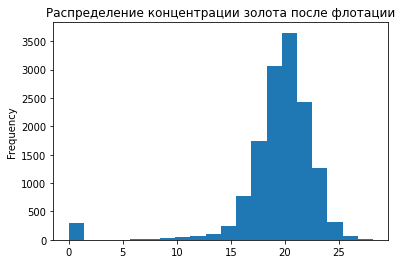

In [23]:
train['rougher.output.concentrate_au'].plot(kind='hist', bins=20, title='Распределение концентрации золота после флотации')

In [24]:
print('Средняя концентрация золота после флотации:', train['rougher.output.concentrate_au'].mean())

Средняя концентрация золота после флотации: 19.43995785143646


<AxesSubplot:title={'center':'Распределение концентрации свинца после флотации'}, ylabel='Frequency'>

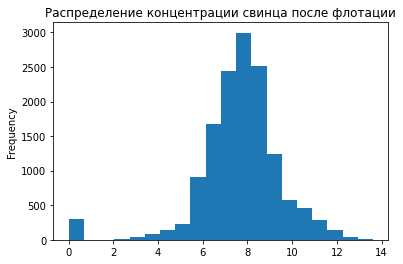

In [25]:
train['rougher.output.concentrate_pb'].plot(kind='hist', bins=20, title='Распределение концентрации свинца после флотации')

In [26]:
print('Средняя концентрация свинца после флотации:', train['rougher.output.concentrate_pb'].mean())

Средняя концентрация свинца после флотации: 7.664554751481546


<AxesSubplot:title={'center':'Распределение концентрации серебра после флотации'}, ylabel='Frequency'>

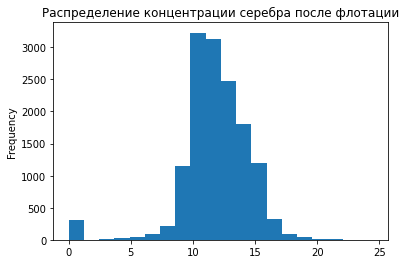

In [27]:
train['rougher.output.concentrate_ag'].plot(kind='hist', bins=20, title='Распределение концентрации серебра после флотации')

In [28]:
print('Средняя концентрация серебра после флотации:', train['rougher.output.concentrate_ag'].mean())

Средняя концентрация серебра после флотации: 11.775812314356036


Исследование концентрации после первого этапа очистки

<AxesSubplot:title={'center':'Распределение концентрации золота после первого этапа очистки'}, ylabel='Frequency'>

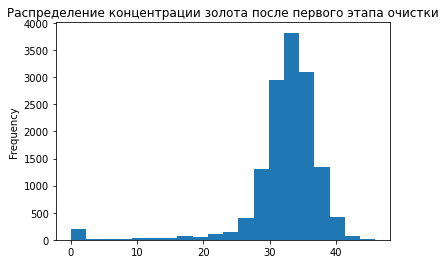

In [29]:
train['primary_cleaner.output.concentrate_au'].plot(kind='hist', bins=20,
                                                    title='Распределение концентрации золота после первого этапа очистки')

In [30]:
print('Средняя концентрация золота после первого этапа очистки:', 
      train['primary_cleaner.output.concentrate_au'].mean())

Средняя концентрация золота после первого этапа очистки: 32.386835978391346


<AxesSubplot:title={'center':'Распределение концентрации свинца после первого этапа очистки'}, ylabel='Frequency'>

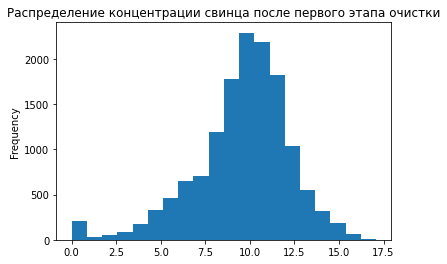

In [31]:
train['primary_cleaner.output.concentrate_pb'].plot(kind='hist', bins=20,
                                                    title='Распределение концентрации свинца после первого этапа очистки')

In [32]:
print('Средняя концентрация свинца после первого этапа очистки:', 
      train['primary_cleaner.output.concentrate_pb'].mean())

Средняя концентрация свинца после первого этапа очистки: 9.59095685721399


<AxesSubplot:title={'center':'Распределение концентрации серебра после первого этапа очистки'}, ylabel='Frequency'>

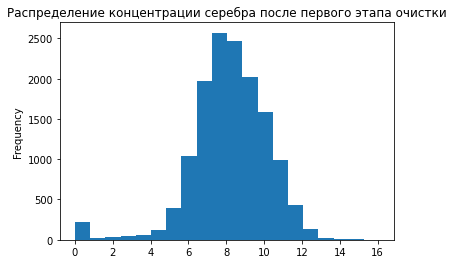

In [33]:
train['primary_cleaner.output.concentrate_ag'].plot(kind='hist', bins=20,
                                                    title='Распределение концентрации серебра после первого этапа очистки')

In [34]:
print('Средняя концентрация серебра после первого этапа очистки:', 
      train['primary_cleaner.output.concentrate_ag'].mean())

Средняя концентрация серебра после первого этапа очистки: 8.200915815165981


Исследование итоговой концентрации металлов

<AxesSubplot:title={'center':'Распределение итоговой концентрации золота'}, ylabel='Frequency'>

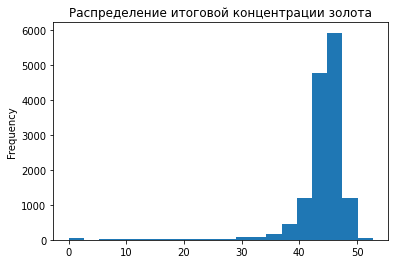

In [35]:
train['final.output.concentrate_au'].plot(kind='hist', bins=20,
                                                    title='Распределение итоговой концентрации золота')

In [36]:
print('Средняя итоговая концентрация золота:', train['final.output.concentrate_au'].mean())

Средняя итоговая концентрация золота: 44.00379162105571


<AxesSubplot:title={'center':'Распределение итоговой концентрации свинца'}, ylabel='Frequency'>

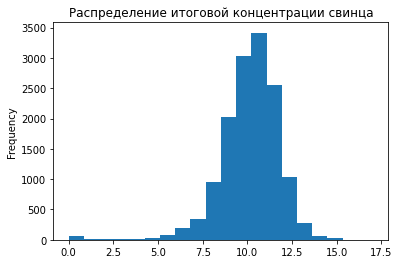

In [37]:
train['final.output.concentrate_pb'].plot(kind='hist', bins=20,
                                                    title='Распределение итоговой концентрации свинца')

In [38]:
print('Средняя итоговая концентрация свинца:', train['final.output.concentrate_pb'].mean())

Средняя итоговая концентрация свинца: 10.13297126798245


<AxesSubplot:title={'center':'Распределение итоговой концентрации серебра'}, ylabel='Frequency'>

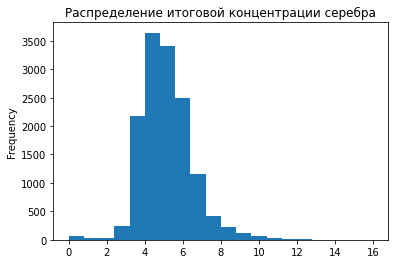

In [39]:
train['final.output.concentrate_ag'].plot(kind='hist', bins=20,
                                                    title='Распределение итоговой концентрации серебра')

In [40]:
print('Средняя итоговая концентрация серебра:', train['final.output.concentrate_ag'].mean())

Средняя итоговая концентрация серебра: 5.142023229896205


Text(0.5, 1.0, 'Изменение концентрации золота')

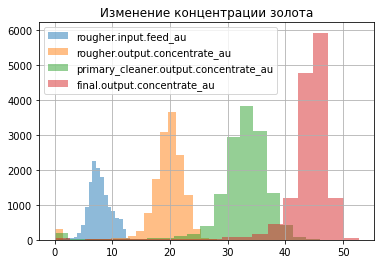

In [42]:

steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component, data):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        data[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)
    
    
plot_concentrate_progress('au', train)
plt.title('Изменение концентрации золота')


Text(0.5, 1.0, 'Изменение концентрации золота')

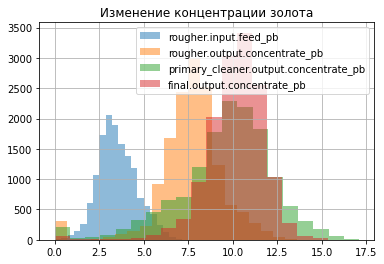

In [43]:
plot_concentrate_progress('pb', train)
plt.title('Изменение концентрации золота')

Text(0.5, 1.0, 'Изменение концентрации золота')

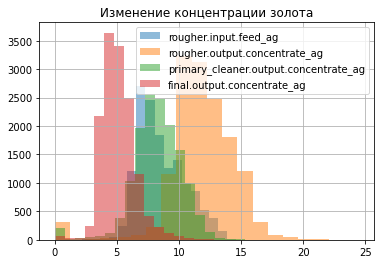

In [44]:
plot_concentrate_progress('ag', train)
plt.title('Изменение концентрации золота')

Итоговая таблица по данному этапу

In [45]:
dicti = {'stage':['rougher', 'primary_cleaner', 'final'], 'mean_au_concentration':[19.4, 32.4, 44],
        'mean_pb_concentration':[7.7, 9.6,  10.13], 'mean_ag_concentration':[11.78, 8.2, 5.14],
        'number_stage':[0, 1, 2]}
res = pd.DataFrame(data=dicti)
res

,stage,mean_au_concentration,mean_pb_concentration,mean_ag_concentration,number_stage
0,rougher,19.4,7.70,11.78,0
1,primary_cleaner,32.4,9.60,8.20,1
2,final,44.0,10.13,5.14,2


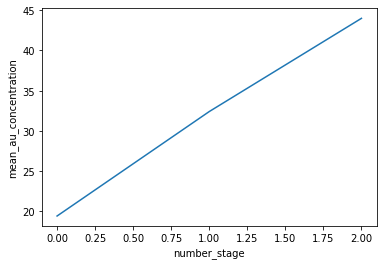

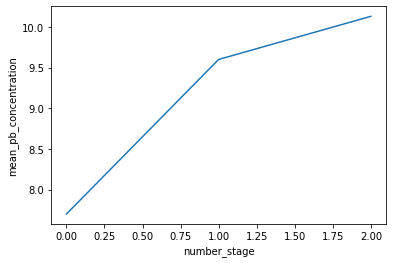

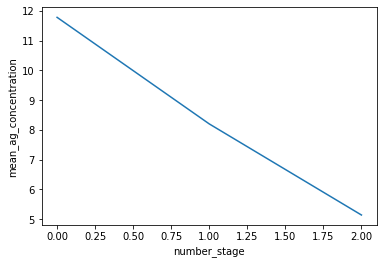

In [46]:
for i in ['mean_au_concentration', 'mean_pb_concentration', 'mean_ag_concentration']:
    sns.lineplot(res['number_stage'],res[i])
    plt.show()

На различных этапах концентрация золота и свинца растет, при этом концентрация серебра убывает

Сравнение распределения размеров гранул сырья

In [47]:
def word_finder(sheet, word):
    res = []
    for i in range(len(sheet)):
        if word in sheet[i]:
            res.append(sheet[i])
    return res

In [48]:
word_finder(train.columns, 'feed_size')

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [49]:
word_finder(test.columns, 'feed_size')

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

Сравнение распределений размера гранул сырья при флотации

<AxesSubplot:title={'center':'Распределение при флотации на обучающей выборке'}, ylabel='Frequency'>

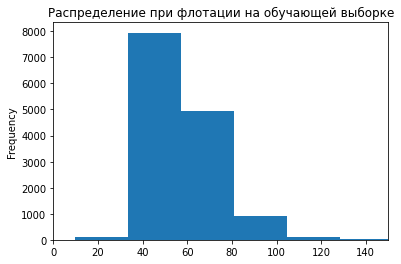

In [50]:
train['rougher.input.feed_size'].plot(kind='hist', bins=20,
                                     title='Распределение при флотации на обучающей выборке', xlim=(0, 150))

<AxesSubplot:title={'center':'Распределение при флотации на тестовой выборке'}, ylabel='Frequency'>

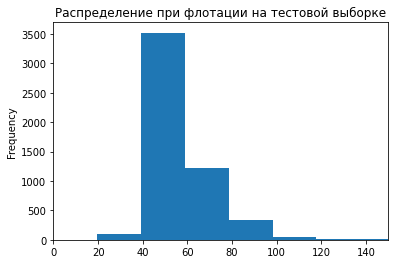

In [51]:
test['rougher.input.feed_size'].plot(kind='hist', bins=20,
                                     title='Распределение при флотации на тестовой выборке', xlim=(0,150))

Сравнение распределений размера гранул сырья при первом этапе очистки

<AxesSubplot:title={'center':'Распределение при первом этапе очистки на обучающей выборке'}, ylabel='Frequency'>

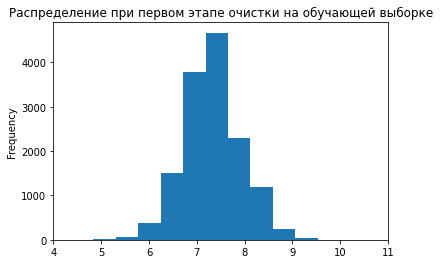

In [52]:
train['primary_cleaner.input.feed_size'].plot(kind='hist', bins=20,
                                     title='Распределение при первом этапе очистки на обучающей выборке', xlim=(4, 11))

<AxesSubplot:title={'center':'Распределение при первом этапе очистки на тестовой выборке'}, ylabel='Frequency'>

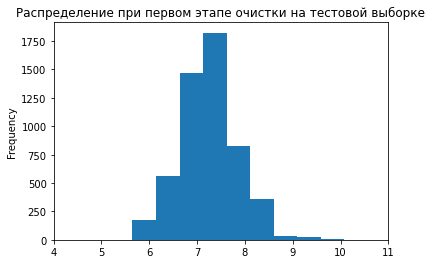

In [53]:
test['primary_cleaner.input.feed_size'].plot(kind='hist', bins=20,
                                     title='Распределение при первом этапе очистки на тестовой выборке', xlim=(4, 11))

In [54]:
def distribution_draw(train, test, name):
    ax = train[name].plot(kind='hist', bins=70)
    test[name].plot(kind='hist', bins=70, ax=ax)

Распределение при флотации

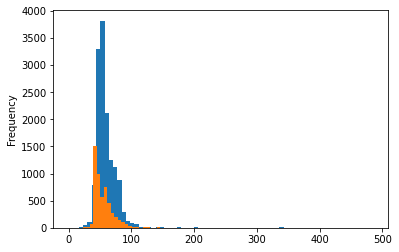

In [55]:
distribution_draw(train, test,'rougher.input.feed_size')

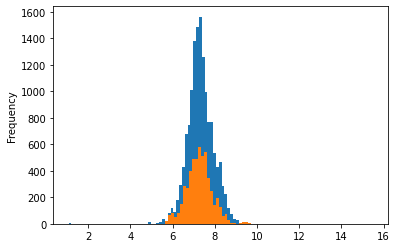

In [56]:
distribution_draw(train, test, 'primary_cleaner.input.feed_size')

Распределения размеров гранул совпадают как при флотации, так и при первичной обработке, поэтому оценики моделей будут верными

Исследование суммарной концентрации всех веществ на разных стадиях

In [57]:
train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [58]:
rougher_concentration = train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_sol']
primary_cleaner_concentration = train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_sol']
final_concentration = train['final.output.concentrate_pb'] + train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + train['final.output.concentrate_sol']

<AxesSubplot:ylabel='Frequency'>

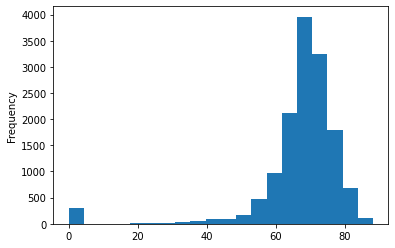

In [59]:
rougher_concentration.plot(kind='hist', bins=20)

In [60]:
print('Среднее значение суммарной концентрации всех веществ при флотации:', rougher_concentration.mean())

Среднее значение суммарной концентрации всех веществ при флотации: 67.18452472255088


<AxesSubplot:ylabel='Frequency'>

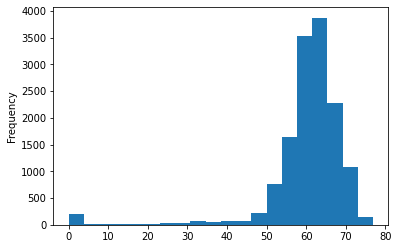

In [61]:
primary_cleaner_concentration.plot(kind='hist', bins=20)

In [62]:
print('Среднее значение суммарной концентрации всех веществ на первом этапе очистки:', primary_cleaner_concentration.mean())

Среднее значение суммарной концентрации всех веществ на первом этапе очистки: 60.28560707067183


<AxesSubplot:ylabel='Frequency'>

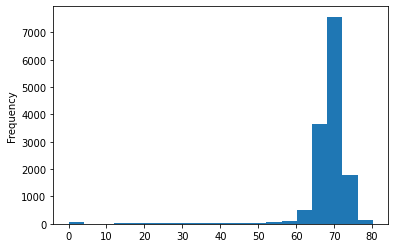

In [63]:
final_concentration.plot(kind='hist', bins=20)

In [64]:
print('Среднее значение итоговой суммарной концентрации всех веществ:', final_concentration.mean())

Среднее значение итоговой суммарной концентрации всех веществ: 68.47630575003733


In [65]:
rougher_concentration.describe()

count    14149.000000
mean        67.184525
std         12.694389
min          0.000000
25%         64.922384
50%         69.175954
75%         73.428728
max         88.140119
dtype: float64

In [66]:
primary_cleaner_concentration.describe()

count    14149.000000
mean        60.285607
std         10.361468
min          0.000000
25%         58.212704
50%         61.810419
75%         65.353030
max         76.918076
dtype: float64

In [67]:
final_concentration.describe()

count    14149.000000
mean        68.476306
std          6.976268
min          0.000000
25%         67.648606
50%         69.165188
75%         70.977986
max         80.210644
dtype: float64

В данных есть аномальные значения, удалим их из выборки, будем удалять 5% сверху и снизу

In [68]:
r1 = rougher_concentration.quantile(0.05)
r2 = rougher_concentration.quantile(0.95)
rougher_concentration = rougher_concentration[r1 < rougher_concentration]
rougher_concentration = rougher_concentration[rougher_concentration < r2]

p1 = primary_cleaner_concentration.quantile(0.05)
p2 = primary_cleaner_concentration.quantile(0.95)
primary_cleaner_concentration = primary_cleaner_concentration[p1 < primary_cleaner_concentration]
primary_cleaner_concentration = primary_cleaner_concentration[primary_cleaner_concentration < p2]

f1 = final_concentration.quantile(0.05)
f2 = final_concentration.quantile(0.95)
final_concentration = final_concentration[p1 < final_concentration]
final_concentration = final_concentration[final_concentration < p2]


In [69]:
indexes = list(rougher_concentration.index) + list(primary_cleaner_concentration.index) + list(final_concentration.index)
indexes = list(set(indexes))

train = train.loc[indexes]


In [70]:
len(train)

13952

График измененения суммарной концентрации

<AxesSubplot:>

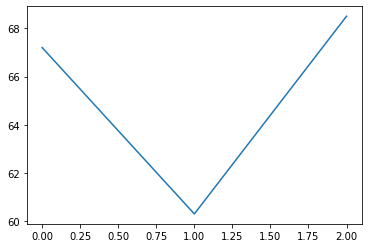

In [71]:
result = pd.Series([67.2, 60.3, 68.5])
dim = [0, 1, 2]
sns.lineplot(dim, result)

Таким образом можно сказать, что при переходе от флотации к первому этапу очистки суммарная концентрация уменьшается, однако потом увеличивается

## Модель

In [72]:
def smape(y_true, y_pred):
    y_true = list(y_true)
    y_pred = list(y_pred)
    if len(y_true) == len(y_pred):
        su =  0
        for i in range(len(y_true)):
            val_1 = abs(y_true[i] - y_pred[i])
            val_2 = (y_true[i] + y_pred[i])/2
            su += val_1 / val_2
        result = su * (100 / len(y_true))
        return result

In [74]:
def res_smape(smape_rougher, smape_final):
    res = 0.25 * smape_rougher + 0.75 * smape_final
    return res

In [75]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [76]:
def cross_valid_regression(data):
    features1 = data.drop(['rougher.output.recovery', 'date'], axis=1)
    target1 = data['rougher.output.recovery']
    features2 = data.drop(['final.output.recovery', 'date'], axis=1)
    target2 = data['final.output.recovery']
    mean_rougher_smape = cross_val_score(
        LinearRegression(), features1, target1,cv=5, scoring=smape_scorer).mean()
    mean_final_smape = cross_val_score(
        LinearRegression(), features2, target2,cv=5, scoring=smape_scorer).mean()
    score = res_smape(mean_rougher_smape, mean_final_smape)
    print('Итоговый Smape для линейной регрессии:', -score) #Ставим минус потому что использовали greatr_is_better=False

In [77]:
cross_valid_regression(train)

Итоговый Smape для линейной регрессии: 6.1316539533626955


In [78]:
def cross_val_cat(data):
    features1 = data.drop(['rougher.output.recovery', 'date'], axis=1)
    target1 = data['rougher.output.recovery']
    features2 = data.drop(['final.output.recovery', 'date'], axis=1)
    target2 = data['final.output.recovery']
    mean_rougher_smape = cross_val_score(
        CatBoostRegressor(random_state=12345), features1, target1,cv=5, scoring=smape_scorer).mean()
    mean_final_smape = cross_val_score(
        CatBoostRegressor(random_state=12345), features2, target2,cv=5, scoring=smape_scorer).mean()
    score = res_smape(mean_rougher_smape, mean_final_smape)
    print('Итоговый Smape для CatBoostRegressor:', -score) #Ставим минус потому что использовали greatr_is_better=False

In [79]:
cross_val_cat(train)

Learning rate set to 0.05994
0:	learn: 13.0121521	total: 85.8ms	remaining: 1m 25s
1:	learn: 12.4405852	total: 113ms	remaining: 56.5s
2:	learn: 11.8775731	total: 140ms	remaining: 46.5s
3:	learn: 11.3839653	total: 167ms	remaining: 41.6s
4:	learn: 10.8706554	total: 192ms	remaining: 38.3s
5:	learn: 10.4182040	total: 218ms	remaining: 36s
6:	learn: 9.9713764	total: 243ms	remaining: 34.5s
7:	learn: 9.5407625	total: 268ms	remaining: 33.2s
8:	learn: 9.1421414	total: 293ms	remaining: 32.3s
9:	learn: 8.7754924	total: 318ms	remaining: 31.5s
10:	learn: 8.3939447	total: 345ms	remaining: 31s
11:	learn: 8.0451664	total: 371ms	remaining: 30.6s
12:	learn: 7.7223484	total: 396ms	remaining: 30.1s
13:	learn: 7.4360046	total: 422ms	remaining: 29.7s
14:	learn: 7.1472785	total: 449ms	remaining: 29.5s
15:	learn: 6.8729160	total: 473ms	remaining: 29.1s
16:	learn: 6.6170742	total: 499ms	remaining: 28.8s
17:	learn: 6.3581778	total: 523ms	remaining: 28.6s
18:	learn: 6.1023437	total: 549ms	remaining: 28.4s
19:	lear

Таблица с итоговыми значениями метрики

In [85]:
di = {'model':['CatBoostRegressor', 'LogisticRegression'], 'res_smape':[2.81, 6.13]}
res_table = pd.DataFrame(data=di)
res_table

,model,res_smape
0,CatBoostRegressor,2.81
1,LogisticRegression,6.13


Показатель метрики res_smape для CatBoostRegressor лучше, поэтому эту модель мы и выберем

Обработка данных для проверки модели на тестовой выборке

In [86]:
test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [87]:
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [88]:
se = test['date']
quer = full.query('date in @se')
quer = quer.drop('date', axis=1)
quer

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4682,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,210.800909,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
4683,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,215.392455,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
4684,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,215.259946,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
4685,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,215.336236,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4686,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,199.099327,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,5.000174,9.710255,10.845459,46.400415,68.919891,13.944836,3.373224,13.766506,3.890235,173.957757,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
15056,4.956679,9.727962,9.705617,46.657393,68.440582,12.624143,2.974607,14.177795,3.809054,172.910270,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
15057,4.779534,9.818943,8.255551,47.337296,67.092759,12.134647,2.843604,13.219960,3.909903,171.135718,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
15058,4.472036,9.473869,8.466341,48.258531,68.061186,12.331412,2.889243,12.165999,3.749126,179.697158,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


Получили срез полной таблицы, соответствующий тестовой выборке

In [84]:
features1 = train.drop(['rougher.output.recovery', 'date'], axis=1)
target1 = train['rougher.output.recovery']
features2 = train.drop(['final.output.recovery', 'date'], axis=1)
target2 = train['final.output.recovery']


model = CatBoostRegressor(random_state=12345)
model.fit(features1, target1)
pred = model.predict(quer.drop('rougher.output.recovery', axis=1))
smape_rougher = smape(quer['rougher.output.recovery'], pred)

model2 = CatBoostRegressor(random_state=12345)
model2.fit(features2, target2)
pred2 = model2.predict(quer.drop('final.output.recovery', axis=1))
smape_final = smape(quer['final.output.recovery'], pred2)

print('Итоговый smape на тестовой выборке', res_smape(smape_rougher, smape_final))

Learning rate set to 0.062091
0:	learn: 12.5710765	total: 40.2ms	remaining: 40.1s
1:	learn: 11.9961688	total: 68.4ms	remaining: 34.1s
2:	learn: 11.3986403	total: 94.4ms	remaining: 31.4s
3:	learn: 10.9132533	total: 134ms	remaining: 33.4s
4:	learn: 10.4288011	total: 170ms	remaining: 33.7s
5:	learn: 9.9890146	total: 200ms	remaining: 33.2s
6:	learn: 9.5593234	total: 231ms	remaining: 32.7s
7:	learn: 9.1479186	total: 258ms	remaining: 32s
8:	learn: 8.7689510	total: 294ms	remaining: 32.3s
9:	learn: 8.4133016	total: 323ms	remaining: 32s
10:	learn: 8.0453959	total: 357ms	remaining: 32.1s
11:	learn: 7.7019259	total: 386ms	remaining: 31.8s
12:	learn: 7.3884270	total: 416ms	remaining: 31.6s
13:	learn: 7.1237311	total: 445ms	remaining: 31.3s
14:	learn: 6.8586356	total: 472ms	remaining: 31s
15:	learn: 6.5852045	total: 500ms	remaining: 30.8s
16:	learn: 6.3264723	total: 528ms	remaining: 30.5s
17:	learn: 6.0806435	total: 557ms	remaining: 30.4s
18:	learn: 5.8305025	total: 584ms	remaining: 30.2s
19:	learn

Модель CatBoostRegressor показала хорошие результаты по целевой метрике как на обучающей, так и на тестовой выборках, поэтому как результат разработки решения для эффективной работы промышленных предприятий лучше использовать именно ее